In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load datasets
customers = pd.read_csv("Customers.csv")
transactions = pd.read_csv("Transactions.csv")

In [5]:
# Data Preparation
# Merge datasets
transactions_summary = transactions.groupby('CustomerID').agg({
    'TotalValue': 'sum',   # Total spend
    'Quantity': 'sum',     # Total quantity purchased
    'Price': 'mean',       # Average price per item
    'TransactionDate': 'count'  # Purchase frequency
}).rename(columns={'TransactionDate': 'PurchaseFrequency'}).reset_index()


In [9]:

customer_data = pd.merge(customers, transactions_summary, on='CustomerID', how='inner')

In [11]:
# Drop unnecessary columns
customer_data_cleaned = customer_data.drop(['CustomerName', 'SignupDate'], axis=1)

In [13]:
# Encode categorical data
customer_data_cleaned['Region'] = customer_data_cleaned['Region'].astype('category').cat.codes

In [15]:
# Scaling features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(customer_data_cleaned.iloc[:, 1:])

In [17]:
# Clustering using K-Means
num_clusters = 5  # You can experiment with 2-10 clusters
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(scaled_features)


In [19]:

# Add cluster labels to data
customer_data_cleaned['Cluster'] = cluster_labels

In [21]:
# Evaluate Clusters
db_index = davies_bouldin_score(scaled_features, cluster_labels)
silhouette_avg = silhouette_score(scaled_features, cluster_labels)
print(f"Davies-Bouldin Index: {db_index:.3f}")
print(f"Silhouette Score: {silhouette_avg:.3f}")

Davies-Bouldin Index: 1.241
Silhouette Score: 0.221


In [23]:
# Dimensionality Reduction for Visualization
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(scaled_features)
customer_data_cleaned['PCA1'] = reduced_features[:, 0]
customer_data_cleaned['PCA2'] = reduced_features[:, 1]

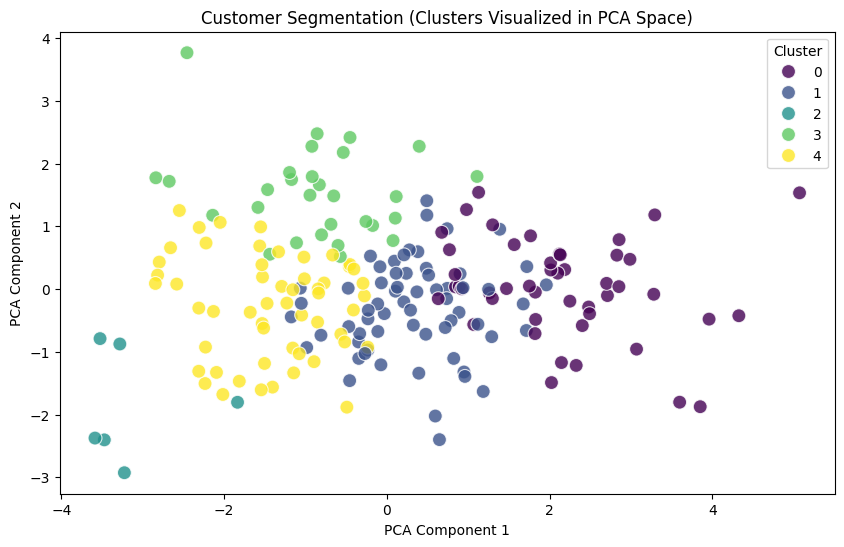

In [25]:

# Plot Clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='PCA1', y='PCA2', hue='Cluster', data=customer_data_cleaned,
    palette='viridis', s=100, alpha=0.8
)
plt.title("Customer Segmentation (Clusters Visualized in PCA Space)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.show()

In [27]:
# Save cleaned data with clusters
customer_data_cleaned.to_csv("Customer_Segmentation_with_Clusters.csv", index=False)